<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/d)_PyTorch_class_based_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def generate_data(n_samples=1000):
    X1 = np.random.uniform(-5, 5, n_samples)
    X2 = np.random.uniform(-5, 5, n_samples)
    X3 = np.random.uniform(-5, 5, n_samples)

    y = (2 * np.sin(X1) + 0.5 * X2**2 + 0.3 * X3**3 +
         np.cos(X1 * X2) + np.random.normal(0, 0.2, n_samples))

    X = np.column_stack((X1, X2, X3))
    return torch.FloatTensor(X), torch.FloatTensor(y.reshape(-1, 1))

X_train, y_train = generate_data()


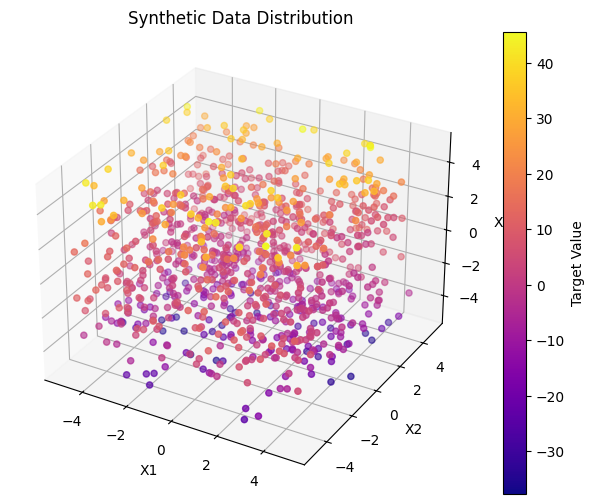

In [3]:
def plot_synthetic_data(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.numpy(), cmap='plasma')
    plt.colorbar(scatter, label='Target Value')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Synthetic Data Distribution')
    plt.show()

plot_synthetic_data(X_train, y_train)


In [4]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [5]:
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0 or epoch < 5:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 229.1172
Epoch 1, Loss: 217.7713
Epoch 2, Loss: 205.8389
Epoch 3, Loss: 192.3158
Epoch 4, Loss: 176.5167
Epoch 50, Loss: 30.4222
Epoch 100, Loss: 13.6630
Epoch 150, Loss: 3.4601
Epoch 200, Loss: 1.3937
Epoch 250, Loss: 0.9544
Epoch 300, Loss: 0.7628
Epoch 350, Loss: 0.6437
Epoch 400, Loss: 0.5782
Epoch 450, Loss: 0.5336
Epoch 500, Loss: 0.5097
Epoch 550, Loss: 0.4780
Epoch 600, Loss: 0.4578
Epoch 650, Loss: 0.4508
Epoch 700, Loss: 0.4246
Epoch 750, Loss: 0.4402
Epoch 800, Loss: 0.4213
Epoch 850, Loss: 0.3998
Epoch 900, Loss: 0.4045
Epoch 950, Loss: 0.3879


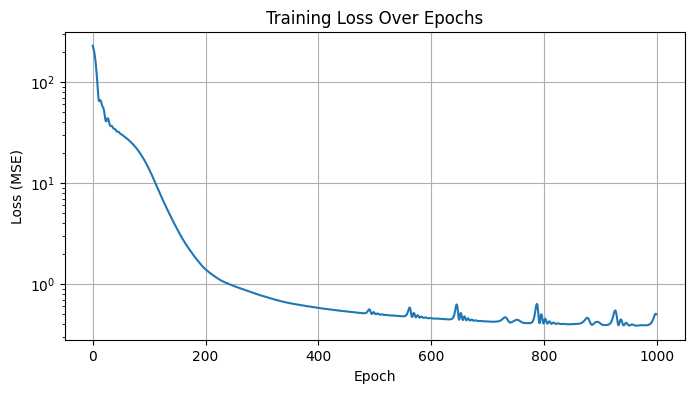

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.yscale("log")
plt.grid(True)
plt.show()

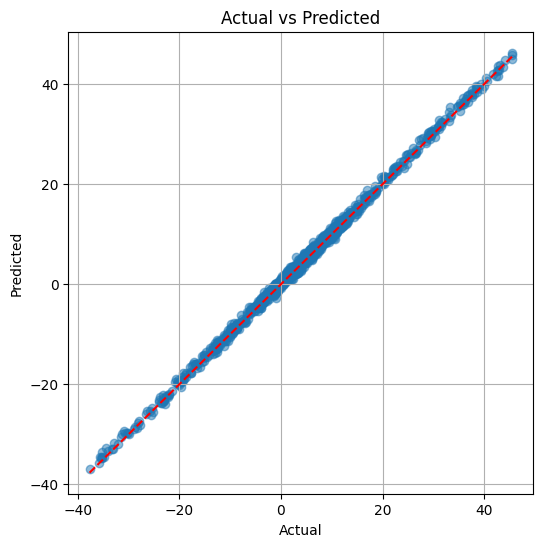

In [7]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(y_train.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


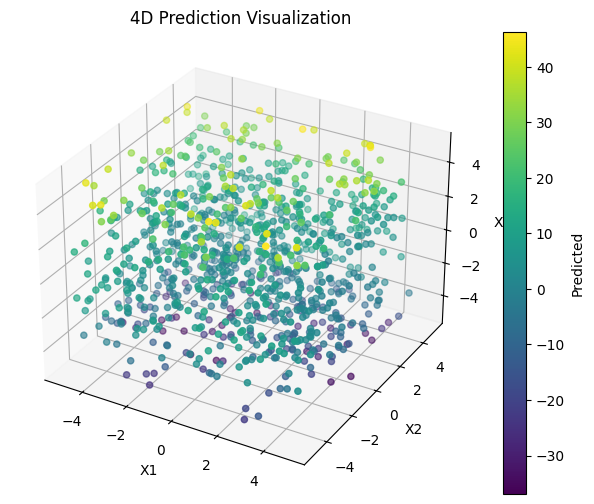

In [8]:
def plot_4d_predictions(X, y_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.numpy(), cmap='viridis')
    plt.colorbar(scatter, label="Predicted")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization")
    plt.show()

plot_4d_predictions(X_train, y_pred)


In [9]:
def predict_custom(model, x1, x2, x3):
    model.eval()
    with torch.no_grad():
        inp = torch.FloatTensor([[x1, x2, x3]])
        return model(inp).item()

test_points = [(-4, -4, -4), (-2, -2, -2), (0, 0, 0), (2, 2, 2), (4, 4, 4)]

print("\nTest Predictions:")
for x1, x2, x3 in test_points:
    pred = predict_custom(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")



Test Predictions:
Input: (-4, -4, -4) → Prediction: -8.515, Actual: -10.644
Input: (-2, -2, -2) → Prediction: -2.053, Actual: -2.872
Input: (0, 0, 0) → Prediction: 1.494, Actual: 1.000
Input: (2, 2, 2) → Prediction: 6.360, Actual: 5.565
Input: (4, 4, 4) → Prediction: 25.412, Actual: 24.729
